In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
def latest_version(cat):#this function gets the latest version of our catalog
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal subset','model','mip_table',
                                               'institute','variable','ensemble_member',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat


In [3]:
col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [4]:
model_name = 'CESM2'

In [5]:
#mlotst, tos,uo,vo

In [6]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [13]:

query_Omon_pr = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 mip_table=['Amon'],
                 ensemble_member=["r1i1p1f1","r1i1p1f2"],
                 model= model_name,
                 #grid_label=['gn'],
                 variable=["pr"])
query_fx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 #mip_table=["Amon"],
                 ensemble_member=["r1i1p1f1","r1i1p1f2"],
                 model= model_name,
                 #grid_label=['gr1'],
                 variable=["areacella"])

In [8]:
def pp_enso(ds):
    ds = ds.copy()   #the wrapper function makes a copy of the ds and works from this
    ds = rename_cmip6(ds)
    ds = fix_time(ds)
    #ds = fix_units(ds)
    #ds = correct_units(ds)
    return ds

In [9]:
cat_Omon_pr = col.search(**query_Omon_pr)
cat_Omon_pr_lat = latest_version(cat_Omon_pr)

cat_Omon_pr_latest = intake.open_esm_datastore(cat_Omon_pr_lat,esmcol_data=esmcol_data)

In [10]:
cat_Omon_pr_latest.df

,project,institute,model,experiment_id,frequency,modeling_realm,mip_table,ensemble_member,grid_label,variable,temporal subset,version,path
22,CMIP6,NCAR,CESM2,historical,mon,atmos,Amon,r1i1p1f1,gn,pr,185001-201412,v20190401,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/historic...
0,CMIP6,NCAR,CESM2,1pctCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,000101-005012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
1,CMIP6,NCAR,CESM2,1pctCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,005101-010012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
2,CMIP6,NCAR,CESM2,1pctCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,010101-015012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
4,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,000101-015012,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
5,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,015101-019912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
6,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,020001-024912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
7,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,025001-029912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
8,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,030001-034912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
9,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,atmos,Amon,r1i1p1f1,gn,pr,035001-039912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...


In [14]:
cat_fx = col.search(**query_fx)
cat_fx_lat = latest_version(cat_fx)

cat_fx_latest = intake.open_esm_datastore(cat_fx_lat,esmcol_data=esmcol_data)

In [16]:
cat_fx_latest.df

,project,institute,model,experiment_id,frequency,modeling_realm,mip_table,ensemble_member,grid_label,variable,temporal subset,version,path
3,CMIP6,NCAR,CESM2,historical,NaN,NaN,fx,r1i1p1f1,gn,areacella,NaN,v20190308,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/historic...
0,CMIP6,NCAR,CESM2,1pctCO2,NaN,NaN,fx,r1i1p1f1,gn,areacella,NaN,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
2,CMIP6,NCAR,CESM2,abrupt-4xCO2,NaN,NaN,fx,r1i1p1f1,gn,areacella,NaN,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...


In [17]:
dict_Omon_pr = cat_Omon_pr_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': True,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [18]:
dict_fx = cat_fx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [19]:
dict_Omon_pr.keys()

dict_keys(['CMIP6.NCAR.CESM2.historical.Amon', 'CMIP6.NCAR.CESM2.1pctCO2.Amon', 'CMIP6.NCAR.CESM2.abrupt-4xCO2.Amon'])

In [20]:
dict_fx.keys()

dict_keys(['CMIP6.NCAR.CESM2.historical.fx', 'CMIP6.NCAR.CESM2.1pctCO2.fx', 'CMIP6.NCAR.CESM2.abrupt-4xCO2.fx'])

In [21]:
ds_fx = dict_fx["CMIP6.NCAR.CESM2.historical.fx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

In [22]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
    # Compute spherical distance from spherical coordinates.
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) =
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    cos = np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(
        phi2
    )
    arc = np.arccos(cos)
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

In [23]:
def find_closest_grid_point(lon, lat, gridlon, gridlat):
    """find integer indices of closest grid point in grid of coordinates
    gridlon, gridlat for a given geographical lon/lat.
    PARAMETERS:
    -----------
        lon (float): longitude of point to find
        lat (float): latitude of point to find
        gridlon (numpy.ndarray): grid longitudes
        gridlat (numpy.ndarray): grid latitudes
    RETURNS:
    --------
    iclose, jclose: integer
        grid indices for geographical point of interest
    """

    if isinstance(gridlon, xr.core.dataarray.DataArray):
        gridlon = gridlon.values
    if isinstance(gridlat, xr.core.dataarray.DataArray):
        gridlat = gridlat.values
    dist = distance_on_unit_sphere(lat, lon, gridlat, gridlon)
    jclose, iclose = np.unravel_index(dist.argmin(), gridlon.shape)
    return iclose, jclose


In [ ]:
i,j= find_closest_grid_point(-157, -5, ds_fx.lon, ds_fx.lat)#for southwest
i,j

In [ ]:
k,l = find_closest_grid_point(-90, 5, ds_Ofx.lon, ds_Ofx.lat)#for northwest
k,l

CALCULATING the summation of areacello

In [24]:
#TODO INSERT CELL SELECT region of interest in areacello
areacella_nino3 = ds_fx.areacella.sel(lat = slice(-5,5), lon = slice(210,270))

In [25]:
areacella_nino3

<xarray.DataArray 'areacella' (ensemble_member: 1, lat: 10, lon: 49)>
dask.array<getitem, shape=(1, 10, 49), dtype=float32, chunksize=(1, 10, 49), chunktype=numpy.ndarray>
Coordinates:
  * lat              (lat) float64 -4.241 -3.298 -2.356 ... 2.356 3.298 4.241
  * lon              (lon) float64 210.0 211.2 212.5 213.8 ... 267.5 268.8 270.0
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes: (12/17)
    cell_methods:   area: sum
    comment:        Cell areas for any grid used to report atmospheric variab...
    description:    Cell areas for any grid used to report atmospheric variab...
    frequency:      fx
    id:             areacella
    long_name:      Grid-Cell Area for Atmospheric Grid Variables
    ...             ...
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Grid-Cell Area for Atmospheric Grid Variables
    type:           real
    units:          m2
    variable_id:    areacella

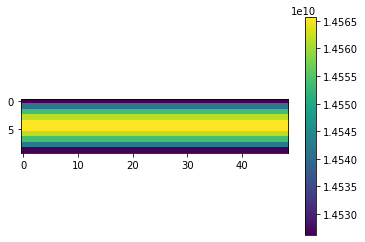

In [26]:
#areacello_nino3.isel(time=0).plot()
plt.imshow(areacella_nino3[0])
plt.colorbar()

In [27]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacella = areacella_nino3.sum(dim=('lon', 'lat'))
total_areacella.size

1

NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

In [30]:
ds_hist

<xarray.Dataset>
Dimensions:          (ensemble_member: 1, lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time             (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    pr               (ensemble_member, time, lat, lon) float32 dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    time_bnds        (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds         (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds         (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Attributes: (12/47)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    [674885.]
    branch_time_in_parent:   [219000.]
    case_id:                 15
    ...                      ...
    tracking_id:             hdl:21.14100/a2c2f719-6790-484b-9f66-392e62cd0eb8
    variable_id:             pr
    variant_info:            CMIP6 20th century experiments (1850-2014) with ...
    variant_label:           r1i1p1f1
    intake_esm_varname:      ['pr']
    intake_esm_dataset_key:  CMIP6.NCAR.CESM2.historical.Amon

## Historical

In [31]:
ds_hist = dict_Omon_pr["CMIP6.NCAR.CESM2.historical.Amon"]


In [32]:
tm_his_st, tm_his_nd = '1980','2011'

In [33]:
ds_hist.dims

Frozen(SortedKeysDict({'ensemble_member': 1, 'time': 1980, 'lat': 192, 'lon': 288, 'nbnd': 2}))

In [35]:
pr_his = ds_hist.pr.sel(time = slice(tm_his_st, tm_his_nd))

In [37]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
pr_his = ds_hist.pr.sel(lat = slice(-5,5), lon = slice(210, 270), time = slice(tm_his_st, tm_his_nd))
pr_his

,Array,Chunk
Bytes,735.00 kiB,1.91 kiB
Shape,"(1, 384, 10, 49)","(1, 1, 10, 49)"
Count,4345 Tasks,384 Chunks
Type,float32,numpy.ndarray


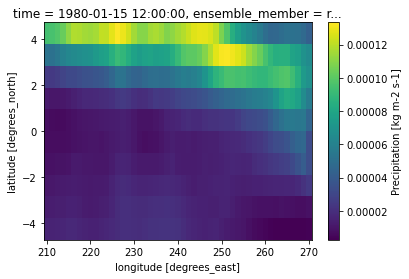

In [38]:
pr_his.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [46]:
pr_mean_nino3_his = (pr_his * areacella_nino3).sum(dim=('lon', 'lat')) / total_areacella
#nino3_index.plot()

In [47]:
pr_mean_nino3_his = pr_mean_nino3_his.compute()
pr_mean_nino3_his

<xarray.DataArray (ensemble_member: 1, time: 384)>
array([[3.79819758e-05, 3.09931893e-05, 2.11095394e-05, 1.62917549e-05,
        4.53425127e-06, 2.80993913e-06, 4.60165211e-06, 2.19232925e-06,
        2.14483293e-06, 2.12638383e-06, 2.68724648e-06, 7.08106927e-06,
        1.62942561e-05, 4.30863765e-05, 4.02900951e-05, 3.65883461e-05,
        2.09619902e-05, 1.27239728e-05, 5.39999246e-06, 4.05183437e-06,
        2.88508591e-06, 2.66669031e-06, 5.31631349e-06, 1.10459796e-05,
        2.72260677e-05, 6.51548253e-05, 5.19702298e-05, 3.33166208e-05,
        1.89668626e-05, 1.29853643e-05, 7.21584183e-06, 5.66827384e-06,
        3.58946841e-06, 6.29257602e-06, 1.79887102e-05, 6.51402152e-05,
        9.29695234e-05, 7.95348169e-05, 1.16722869e-04, 1.21343117e-04,
        7.11411267e-05, 2.18554942e-05, 4.62012076e-06, 2.23487018e-06,
        1.76774540e-06, 1.51620986e-06, 3.24236794e-06, 5.16895170e-06,
        1.91026138e-05, 2.51628408e-05, 3.24079265e-05, 2.90330681e-05,
        2.92213663e-05, 1.25261768e-05, 9.71166264e-06, 5.18728348e-06,
        2.47740309e-06, 3.11952635e-06, 6.02021373e-06, 1.85201279e-05,
        2.67753749e-05, 2.80556578e-05, 3.27787857e-05, 2.91911601e-05,
        8.55611506e-06, 4.13120233e-06, 5.21167476e-06, 3.59418686e-06,
        2.74107015e-06, 2.61321020e-06, 4.04044749e-06, 1.11100890e-05,
        2.49969780e-05, 2.65431318e-05, 4.59264447e-05, 3.50683222e-05,
        2.34272029e-05, 1.48524414e-05, 8.22318088e-06, 5.27094562e-06,
...
        2.02341471e-06, 2.28191175e-06, 3.69365125e-06, 1.39479507e-05,
        3.15898724e-05, 4.15043396e-05, 5.49349934e-05, 6.89114459e-05,
        5.29703393e-05, 4.13250782e-05, 2.07050743e-05, 1.07986316e-05,
        7.58487704e-06, 8.45189606e-06, 2.16268218e-05, 7.81668423e-05,
        1.23395817e-04, 1.14900024e-04, 1.52051289e-04, 1.23281279e-04,
        6.80865414e-05, 1.11787322e-05, 3.91399726e-06, 2.21076994e-06,
        2.21945197e-06, 1.59076114e-06, 2.12294094e-06, 4.43192539e-06,
        1.30365715e-05, 2.14322190e-05, 2.02024839e-05, 1.48791041e-05,
        4.25181406e-06, 3.88197532e-06, 5.61009756e-06, 3.89259503e-06,
        2.59745639e-06, 2.06411187e-06, 2.65744984e-06, 4.24478731e-06,
        1.34598913e-05, 2.30319474e-05, 3.92290858e-05, 4.15744980e-05,
        3.06032816e-05, 1.97114659e-05, 1.13204351e-05, 7.87727731e-06,
        8.65100264e-06, 4.97696237e-06, 1.04670917e-05, 2.51889578e-05,
        5.94684971e-05, 6.09090457e-05, 5.07797340e-05, 4.96058528e-05,
        3.51728158e-05, 9.40154132e-06, 4.80462995e-06, 2.30483761e-06,
        1.55115015e-06, 1.79218307e-06, 2.21422761e-06, 5.08560061e-06,
        1.08939566e-05, 1.96001965e-05, 3.45895241e-05, 3.31742558e-05,
        1.82246695e-05, 1.03911661e-05, 1.12431635e-05, 5.89328056e-06,
        6.13835709e-06, 3.26412965e-06, 4.95837776e-06, 2.25657241e-05]],
      dtype=float32)
Coordinates:
  * time             (time) object 1980-01-15 12:00:00 ... 2011-12-15 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [41]:
pr_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [42]:
pr_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([3.7981976e-05], dtype=float32)
Coordinates:
    time             object 1980-01-15 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [43]:
datetimeindex = pr_mean_nino3_his.indexes['time'].to_datetimeindex()
pr_mean_nino3_his['time'] = datetimeindex


<ipython-input-43-d7d5cda41f1d>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = pr_mean_nino3_his.indexes['time'].to_datetimeindex()


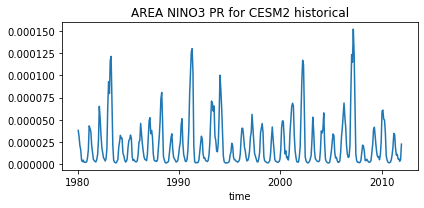

In [48]:
pr_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).plot(aspect=2, size=3)
plt.title(f"AREA NINO3 PR for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Hist_PR_{tm_his_st}_{tm_his_nd}.png")

ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [49]:
pr_nino3_climatology = pr_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).groupby('time.month').mean(dim='time')


In [50]:
pr_nino3_climatology = pr_nino3_climatology.compute()

In [51]:
#tos_nino3_climatology.sum().plot()

In [52]:
pr_nino3_climatology

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[3.4777968e-05, 4.4397719e-05, 5.4217853e-05, 5.0631752e-05,
        3.0070478e-05, 1.2882207e-05, 7.6936076e-06, 4.6988234e-06,
        3.5442829e-06, 3.3208953e-06, 6.6540651e-06, 1.7908125e-05]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [53]:
print(pr_nino3_climatology)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[3.4777968e-05, 4.4397719e-05, 5.4217853e-05, 5.0631752e-05,
        3.0070478e-05, 1.2882207e-05, 7.6936076e-06, 4.6988234e-06,
        3.5442829e-06, 3.3208953e-06, 6.6540651e-06, 1.7908125e-05]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


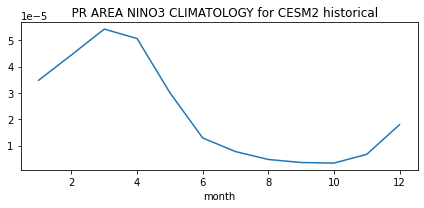

In [54]:
pr_nino3_climatology.plot(aspect=2, size=3)
plt.title(f"   PR AREA NINO3 CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Hist_Clima_PR_{tm_his_st}_{tm_his_nd}.png")

monthly anomaly of Precipitation (or PR here) over the Nino3 region

we subtract the monthly climatology values calculated above from the PR value values and then do
a spatial average across the region of interest

In [55]:
anomaly_nino3_pr = (pr_his.groupby('time.month')-pr_nino3_climatology).mean(dim=['lon','lat'])

In [56]:
anomaly_nino3_pr = anomaly_nino3_pr.compute()

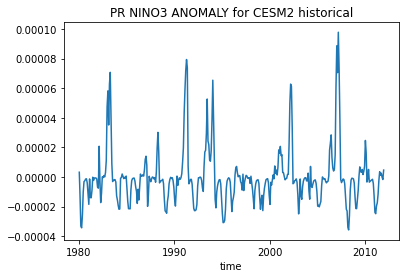

In [58]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
anomaly_nino3_pr.plot()
plt.title(f"PR NINO3 ANOMALY for {model_name} historical")
plt.savefig(f"{model_name}_Hist_PrAnomaly_{tm_his_st}_{tm_his_nd}.png")

In [59]:
np.save(f"{model_name}anoma_nino3_hist.npy", np.array(anomaly_nino3_pr))

### 1%CO2

In [60]:
ds_1pct = dict_Omon_pr["CMIP6.NCAR.CESM2.1pctCO2.Amon"]

In [61]:
ds_1pct.time.to_dataframe()

,time
time,
0001-01-15 12:00:00,0001-01-15 12:00:00
0001-02-14 00:00:00,0001-02-14 00:00:00
0001-03-15 12:00:00,0001-03-15 12:00:00
0001-04-15 00:00:00,0001-04-15 00:00:00
0001-05-15 12:00:00,0001-05-15 12:00:00
...,...
0150-08-15 12:00:00,0150-08-15 12:00:00
0150-09-15 00:00:00,0150-09-15 00:00:00
0150-10-15 12:00:00,0150-10-15 12:00:00


In [62]:
tm_1pct_st, tm_1pct_nd = "0119", "0150"


In [63]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

pr_1pct = ds_1pct.pr.sel(lat = slice(-5,5), lon = slice(210,270), time = slice(tm_1pct_st, tm_1pct_nd))
pr_1pct

,Array,Chunk
Bytes,735.00 kiB,1.91 kiB
Shape,"(1, 384, 10, 49)","(1, 1, 10, 49)"
Count,5787 Tasks,384 Chunks
Type,float32,numpy.ndarray


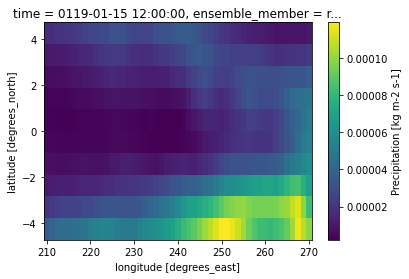

In [64]:
pr_1pct.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [65]:
pr_mean_nino3_1pct = (pr_1pct * areacella_nino3).sum(dim=('lon', 'lat')) / total_areacella
#nino3_index.plot()

In [66]:
pr_mean_nino3_1pct = pr_mean_nino3_1pct.compute()

In [67]:
pr_mean_nino3_1pct.size

384

In [68]:
pr_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([2.9790986e-05], dtype=float32)
Coordinates:
    time             object 0119-01-15 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [69]:
#datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

In [70]:
#tos_mean_nino3_1pct['time'] = datetimeindex_1pct

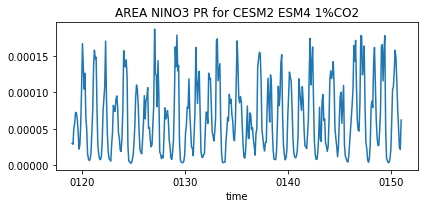

In [71]:
pr_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 PR for {model_name} ESM4 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCo2_PR_{tm_1pct_st}_{tm_1pct_nd}.png")

In [72]:
pr_nino3_climatology_1pct = pr_mean_nino3_1pct.groupby('time.month').mean(dim='time')


In [73]:
pr_nino3_climatology_1pct = pr_nino3_climatology_1pct.compute()

In [74]:
print (pr_nino3_climatology_1pct)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[1.06748405e-04, 1.02808284e-04, 9.54832140e-05, 1.13645568e-04,
        1.19033008e-04, 7.20742246e-05, 4.28722560e-05, 2.63486836e-05,
        1.77959137e-05, 1.57459708e-05, 2.73753321e-05, 5.61308916e-05]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


In [75]:
#tos_nino3_climatology_1pct.isel(month=0).plot()

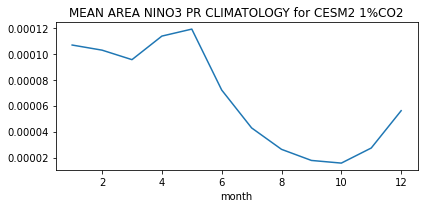

In [76]:
pr_nino3_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 PR CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCO2_PRClima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [77]:
#tos_sel = tos_1pct.sel(time=slice('0119','0150'))
anomaly_nino3_1pct = (pr_1pct.groupby('time.month')-pr_nino3_climatology_1pct).mean(dim=['lon','lat'])

In [78]:
anomaly_nino3_1pct = anomaly_nino3_1pct.compute()

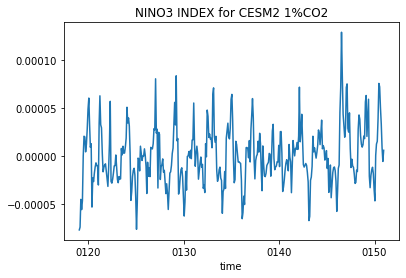

In [79]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
anomaly_nino3_1pct.plot()
plt.title(f"NINO3 INDEX for {model_name} 1%CO2")
plt.savefig(f"{model_name}_1pctCO2_AnomaPR_{tm_1pct_st}_{tm_1pct_nd}.png")

In [80]:
np.save(f"{model_name}anoma_nino3_1pct.npy", np.array(anomaly_nino3_1pct))

## Abrupt-4xCO2

In [81]:
ds_4x = dict_Omon_pr["CMIP6.NCAR.CESM2.abrupt-4xCO2.Amon"]

In [87]:
ds_4x.time.to_dataframe()

,time
time,
0001-01-15 12:00:00,0001-01-15 12:00:00
0001-02-14 00:00:00,0001-02-14 00:00:00
0001-03-15 12:00:00,0001-03-15 12:00:00
0001-04-15 00:00:00,0001-04-15 00:00:00
0001-05-15 12:00:00,0001-05-15 12:00:00
...,...
0999-08-15 12:00:00,0999-08-15 12:00:00
0999-09-15 00:00:00,0999-09-15 00:00:00
0999-10-15 12:00:00,0999-10-15 12:00:00


In [88]:
tm_4x_st,tm_4x_nd = "0119", "0150"

In [89]:
#tos_4x = ds_4x.tos.sel(time = slice(tm_4x_st,tm_4x_nd))

In [90]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
pr_4x = ds_4x.pr.sel(lat = slice(-5,5), lon = slice(210, 270), time = slice(tm_4x_st,tm_4x_nd) )
pr_4x

,Array,Chunk
Bytes,735.00 kiB,1.91 kiB
Shape,"(1, 384, 10, 49)","(1, 1, 10, 49)"
Count,36366 Tasks,384 Chunks
Type,float32,numpy.ndarray


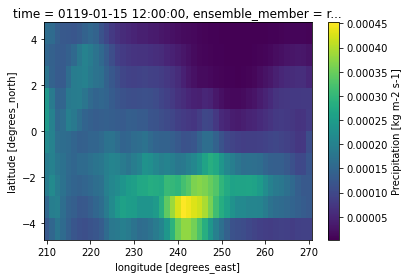

In [91]:
pr_4x.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [92]:
pr_mean_nino3_4x = (pr_4x * areacella_nino3).sum(dim=('lon', 'lat')) / total_areacella

In [93]:
pr_mean_nino3_4x = pr_mean_nino3_4x.compute()
pr_mean_nino3_4x

<xarray.DataArray (ensemble_member: 1, time: 384)>
array([[1.33346402e-04, 8.91533564e-05, 5.41447007e-05, 9.70576584e-05,
        1.20984594e-04, 1.05073101e-04, 4.00511672e-05, 2.01747753e-05,
        2.29224479e-05, 1.59381798e-05, 4.09052918e-05, 9.03714463e-05,
        1.31933411e-04, 6.96211209e-05, 5.25752112e-05, 9.86078521e-05,
        1.30058310e-04, 1.27908454e-04, 1.05662490e-04, 6.99591765e-05,
        6.59360594e-05, 5.35608342e-05, 6.83647158e-05, 1.20744051e-04,
        1.65763005e-04, 1.21422185e-04, 9.27019719e-05, 8.93975230e-05,
        9.55881405e-05, 7.38334638e-05, 3.47837013e-05, 1.48828994e-05,
        1.24782064e-05, 2.03381187e-05, 2.74268023e-05, 9.14922275e-05,
        8.26186952e-05, 7.77813912e-05, 7.49155879e-05, 1.07397631e-04,
        1.24763348e-04, 1.42255012e-04, 1.10323163e-04, 5.78708386e-05,
        2.53706166e-05, 1.23543905e-05, 4.42241362e-05, 7.40420583e-05,
        1.13380229e-04, 1.02138532e-04, 6.39126156e-05, 8.83188841e-05,
        1.18691321e-04, 7.32557310e-05, 3.96343166e-05, 2.47779553e-05,
        3.29643517e-05, 4.28327730e-05, 5.22775954e-05, 1.12375019e-04,
        1.55439207e-04, 1.20996629e-04, 1.11174646e-04, 7.95224987e-05,
        1.57785020e-04, 1.78992646e-04, 6.14421806e-05, 3.36763333e-05,
        3.66294880e-05, 2.37455752e-05, 3.12342490e-05, 9.79355100e-05,
        1.27197956e-04, 7.24855345e-05, 8.64049725e-05, 1.21188437e-04,
        1.60536845e-04, 5.69208023e-05, 5.54380495e-05, 2.79586566e-05,
...
        9.98954638e-05, 5.27890843e-05, 7.11213943e-05, 9.58237870e-05,
        1.80947260e-04, 1.20499004e-04, 8.20077039e-05, 1.24260056e-04,
        1.43571961e-04, 1.31844601e-04, 6.81225065e-05, 5.98514525e-05,
        3.28485148e-05, 3.70387097e-05, 4.70897139e-05, 1.22395810e-04,
        9.41883627e-05, 1.32828456e-04, 5.42350681e-05, 5.55119623e-05,
        1.02209422e-04, 9.56054791e-05, 5.09128840e-05, 4.79563641e-05,
        4.70895575e-05, 2.98979212e-05, 5.09971869e-05, 1.08689455e-04,
        1.51205095e-04, 1.09222245e-04, 4.05291503e-05, 9.80084515e-05,
        1.48096238e-04, 8.02733339e-05, 4.54726069e-05, 2.96313938e-05,
        1.82743715e-05, 1.86974157e-05, 2.56016247e-05, 7.84044023e-05,
        1.12319394e-04, 6.24180393e-05, 3.83433617e-05, 7.41250406e-05,
        1.34041140e-04, 1.06343927e-04, 1.06496947e-04, 8.94345794e-05,
        8.21573267e-05, 3.48020840e-05, 6.21021318e-05, 1.15760493e-04,
        2.01219358e-04, 1.20927791e-04, 1.27148887e-04, 1.41059529e-04,
        1.44842925e-04, 1.18155658e-04, 6.82950122e-05, 5.81622808e-05,
        3.91760623e-05, 4.67631580e-05, 5.26683434e-05, 1.34203045e-04,
        1.44042235e-04, 8.83814719e-05, 9.02394240e-05, 9.85994993e-05,
        1.20203302e-04, 1.23954553e-04, 7.40507094e-05, 5.86997012e-05,
        3.93485789e-05, 2.70054170e-05, 5.93859004e-05, 1.26767030e-04]],
      dtype=float32)
Coordinates:
  * time             (time) object 0119-01-15 12:00:00 ... 0150-12-15 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [94]:
pr_mean_nino3_4x.size #380 values, 1 value per month , 12 per year for 165 years
#it's 380 values because of time we selected for this simulation

384

In [95]:
pr_mean_nino3_4x.isel(time=0)

<xarray.DataArray (ensemble_member: 1)>
array([0.00013335], dtype=float32)
Coordinates:
    time             object 0119-01-15 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [96]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


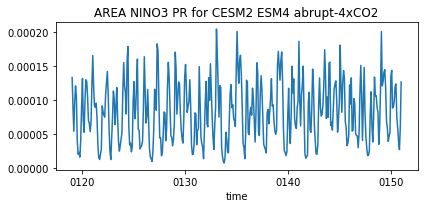

In [97]:
pr_mean_nino3_4x.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 PR for {model_name} ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCo2_PR_{tm_4x_st}_{tm_4x_nd}.png")

In [98]:
pr_nino3_climatology_4x = pr_mean_nino3_4x.groupby('time.month').mean(dim='time')


In [99]:
pr_nino3_climatology_4x = pr_nino3_climatology_4x.compute()


In [100]:
#tos_nino3_climatology_4x.isel(month=0).plot()

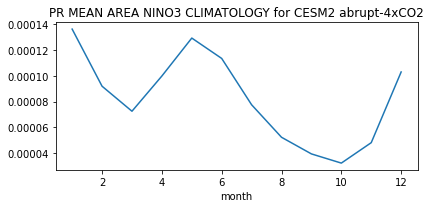

In [101]:
pr_nino3_climatology_4x.plot(aspect=2, size=3)
plt.title(f"PR MEAN AREA NINO3 CLIMATOLOGY for {model_name} abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCO2_ClimaPR_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [102]:
#tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
anoma_nino3_4x = (pr_4x.groupby('time.month')-pr_nino3_climatology_4x).mean(dim=["lon",'lat'])

In [103]:
anoma_nino3_4x = anoma_nino3_4x.compute()

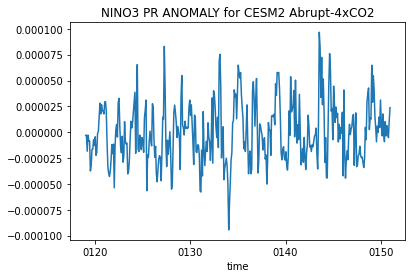

In [104]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex

anoma_nino3_4x.plot()
plt.title(f"NINO3 PR ANOMALY for {model_name} Abrupt-4xCO2")
plt.savefig(f"{model_name}_4xCO2_Nino3AnomaPR_{tm_1pct_st}_{tm_1pct_nd}.png")

In [105]:
np.save(f"{model_name}anoma_nino3_4x.npy", np.array(anoma_nino3_4x))